### Exploring increasing the number of samples

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
in_domain_results = os.listdir("../results/cross_validated_results/in_domain_extra_sample_results")

In [3]:
in_domain_results = [i for i in in_domain_results if "individual_stats" in i]

In [4]:
SAMPLING_UNCERTAINTY_TYPES = {
    "MC-Drop",
    "Ens",
    "Ind",
    "P-Unet",
    "SSN",
    "SSN-Ens",
}

In [5]:
def convert_files_to_large_df(folder, filenames):
    dfs = []
    for fn in filenames:
        df = pd.read_csv(os.path.join(folder, fn))
        if "_evidential_b" in fn:
            uncertainty_type = "Evid"
        elif "_deterministic_b" in fn:
            uncertainty_type = "SEnt"
        elif "_ind_b" in fn:
            uncertainty_type = "Ind"
        elif "_punet_b" in fn:
            uncertainty_type = "P-Unet"
        elif "_ens_b" in fn and "ssn" not in fn:
            uncertainty_type = "Ens"
        elif "_mc_drop_b" in fn:
            uncertainty_type = "MC-Drop"
        elif "_ssn_ens_b" in fn:
            uncertainty_type = "SSN-Ens"
        elif "_ssn_b" in fn:
            uncertainty_type = "SSN"
        else:
            print("uncertainty type unclear for ", fn)
            continue
            
        cv_fold = fn.split("_")[-3][-1]
        
        df['uncertainty_type'] = [uncertainty_type for _ in range(len(df))]
        df['cv_fold'] = [cv_fold for _ in range(len(df))]
        
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=False)

In [24]:
from scipy.stats import t as t_distribution
def mean_and_95_conf_over_cvfold(df, metric, return_sem=True):
    cv_scores = df.groupby(['uncertainty_type', 'cv_fold'])[metric].mean().groupby('uncertainty_type')
    mean = cv_scores.mean().rename(f"{metric} mean", axis='index')
    std = cv_scores.std(ddof=1)
    size = cv_scores.size()
    sem_value = std / (np.sqrt(size))
    
    confidence_level = 0.95
    degrees_of_freedom = size - 1
    margin_of_error = t_distribution.ppf((1 + confidence_level) / 2, degrees_of_freedom) * sem_value
    margin_of_error = margin_of_error.rename(f"{metric} 95%")
    sem_value  = sem_value.rename(f"{metric} 95%")
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    
    if return_sem:
        return pd.concat([mean, sem_value], axis=1)#, confidence_interval[0], confidence_interval[1]], axis=1)
    else:
        return pd.concat([mean, margin_of_error], axis=1)

In [25]:
in_domain_df = convert_files_to_large_df("../results/cross_validated_results/in_domain_extra_sample_results", in_domain_results)

In [26]:
in_domain_df

,Unnamed: 0,gt_vols,best_dice_ss2,best_avd_ss2,best_dice_dsorted_ss2,GED^2_ss2,sUEO_ss2,best_dice_ss3,best_avd_ss3,best_dice_dsorted_ss3,...,GED^2_ss25,sUEO_ss25,best_dice_ss30,best_avd_ss30,best_dice_dsorted_ss30,GED^2_ss30,sUEO_ss30,model_name,uncertainty_type,cv_fold
0,0,"2,290.000",0.432,53.188,0.434,1.408,0.472,0.434,53.013,0.437,...,1.421,0.472,0.438,52.402,0.443,1.423,0.472,ind_cv1,Ind,1
1,1,"19,229",0.857,7.255,0.858,0.487,0.497,0.857,7.244,0.858,...,0.492,0.497,0.857,7.015,0.859,0.491,0.497,ind_cv1,Ind,1
2,2,"3,486.000",0.595,39.902,0.597,1.132,0.428,0.596,39.644,0.598,...,1.139,0.428,0.597,39.386,0.600,1.139,0.428,ind_cv1,Ind,1
3,3,"1,738.000",0.548,43.153,0.552,1.209,0.444,0.552,43.038,0.554,...,1.222,0.444,0.553,42.117,0.558,1.222,0.444,ind_cv1,Ind,1
4,4,"27,193",0.884,1.850,0.884,0.402,0.494,0.884,1.732,0.885,...,0.406,0.494,0.885,1.537,0.886,0.405,0.494,ind_cv1,Ind,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,37,"40,014",0.790,16.409,0.791,0.662,0.462,0.790,16.322,0.791,...,0.672,0.462,0.790,16.179,0.792,0.672,0.462,ind_cv4,Ind,4
38,38,"18,296",0.804,9.942,0.805,0.623,0.516,0.804,9.980,0.804,...,0.631,0.516,0.804,9.483,0.807,0.631,0.516,ind_cv4,Ind,4
39,39,"5,409.000",0.750,12.978,0.751,0.780,0.484,0.751,12.867,0.752,...,0.784,0.484,0.751,12.350,0.754,0.785,0.484,ind_cv4,Ind,4
40,40,"15,651",0.857,14.619,0.858,0.476,0.509,0.857,14.491,0.858,...,0.483,0.509,0.859,14.255,0.860,0.482,0.509,ind_cv4,Ind,4


In [27]:
pd.set_option('display.float_format',
      lambda x: '{:,.3f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))

In [28]:
dfs = []
for key in ["best_dice_dsorted_ss10"]:
    dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key, return_sem=False))
standard_metrics_df = pd.concat(dfs, axis=1)
standard_metrics_df.to_csv("in_domain_best_dice_sample_sorted_stats.csv")
standard_metrics_df

,best_dice_dsorted_ss10 mean,best_dice_dsorted_ss10 95%
uncertainty_type,,
Ens,0.705,0.029
Ind,0.668,0.026
MC-Drop,0.697,0.027
P-Unet,0.675,0.023
SSN,0.716,0.023
SSN-Ens,0.731,0.025


In [22]:
standard_metrics_df['best_dice_dsorted_ss10 mean']

uncertainty_type
Ens       0.705
Ind       0.668
MC-Drop   0.697
P-Unet    0.675
SSN       0.716
SSN-Ens   0.731
Name: best_dice_dsorted_ss10 mean, dtype: float64

In [8]:
import matplotlib as mpl
cmap = mpl.colormaps['Set2']
UNCERTAINTY_COLOURS = {
    'Ens':cmap(0),
    'Evid':cmap(1),
    'Ind':cmap(2),
    'MC-Drop':cmap(3),
    'P-Unet':cmap(4),
    'SEnt':cmap(5),
    'SSN':cmap(6),
    'SSN-Ens':cmap(7),
}

In [9]:
from collections import defaultdict
from scipy.stats import t as t_distribution


In [10]:
def plot_metric_as_samples_increase(df, metric, ylabel, title, dolegend):
    metric_vals = {}
    sample_nums = [2,3,5,7,10,15,20,25,30]

    dataset_averages = df.groupby(['uncertainty_type', 'cv_fold'])[[f'{metric}_ss{s}' for s in sample_nums]].mean().groupby(['uncertainty_type'])
    mean_score = dataset_averages.mean()
    std = dataset_averages.std()
    size = 6#dataset_averages.size()

    sem_value = std / (np.sqrt(size))
    confidence_level = 0.95
    degrees_of_freedom = size - 1
    # margin_of_error = t_distribution.ppf((1 + confidence_level) / 2, degrees_of_freedom) * sem_value

    for key in SAMPLING_UNCERTAINTY_TYPES:

        # plt.plot(sample_nums, mean_score.loc[key].values, '--', alpha=0.7, color=UNCERTAINTY_COLOURS[key])
        plt.scatter(sample_nums, mean_score.loc[key].values, label=key, zorder=3, color=UNCERTAINTY_COLOURS[key])
        plt.errorbar(sample_nums, mean_score.loc[key].values, yerr= sem_value.loc[key].values,
                     color=UNCERTAINTY_COLOURS[key], capsize=5, linestyle='--', linewidth=2)
    
    if dolegend:
        plt.legend(loc='upper right');

    plt.xlabel("Number of Samples")
    plt.ylabel(ylabel)
    
    # plt.legend(['Line']) 
    plt.title(title)

    # Specify which grid lines  
    plt.grid(axis='both', linestyle='--', linewidth=0.5) 
    
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    

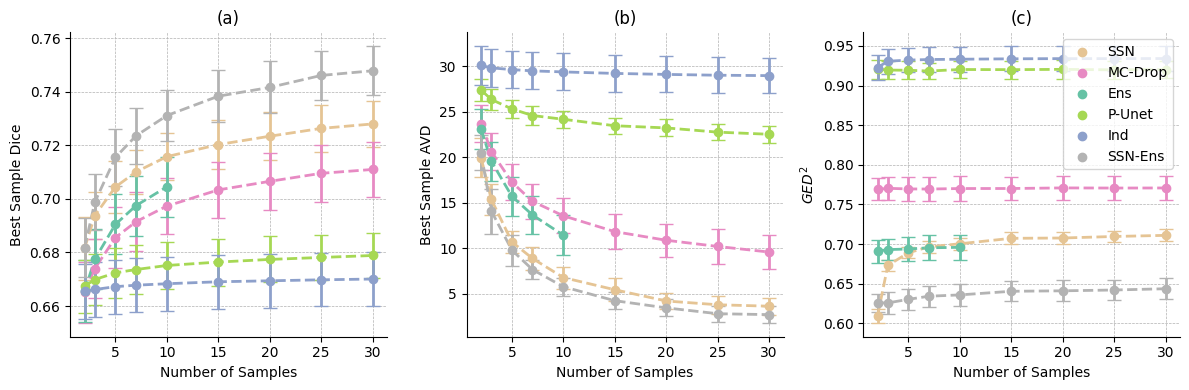

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plot_metric_as_samples_increase(in_domain_df, "best_dice_dsorted", r"Best Sample Dice", "(a)", False)
plt.subplot(1,3,2)
plot_metric_as_samples_increase(in_domain_df, "best_avd", r"Best Sample AVD", "(b)", False)
plt.subplot(1,3,3)
plot_metric_as_samples_increase(in_domain_df, "GED^2", r"$GED^2$", "(c)", True)

plt.tight_layout()
plt.savefig("plots_output/increasing_sample_num_plot.pdf", bbox_inches="tight")

In [50]:
margin_of_error

,best_avd_ss2,best_avd_ss3,best_avd_ss5,best_avd_ss7,best_avd_ss10,best_avd_ss15,best_avd_ss20,best_avd_ss25,best_avd_ss30
uncertainty_type,,,,,,,,,
Ens,5.722251,5.497710,5.593421,5.305655,5.646043,NaN,NaN,NaN,NaN
Ind,5.451732,5.278979,5.227954,5.217156,5.222398,5.121281,5.079315,5.015354,5.014117
MC-Drop,5.252105,5.235049,5.159455,4.909893,4.921788,4.984549,4.727297,4.991867,4.747354
P-Unet,3.194817,2.954604,2.586056,2.562870,2.479734,2.315445,2.402762,2.301648,2.428721
SSN,5.547337,4.368766,3.203798,3.354275,3.105478,3.198758,2.348717,2.555407,2.361789
SSN-Ens,4.943625,6.344145,4.379807,2.770161,2.520664,2.462456,2.389692,2.313378,2.330791


In [27]:
mean_score.loc['Ens']

GED^2_ss2     0.691047
GED^2_ss3     0.693040
GED^2_ss5     0.693811
GED^2_ss7     0.695330
GED^2_ss10    0.695895
GED^2_ss15         NaN
GED^2_ss20         NaN
GED^2_ss25         NaN
GED^2_ss30         NaN
Name: Ens, dtype: float64

In [15]:
in_domain_df.keys()

Index(['Unnamed: 0', 'gt_vols', 'best_dice_ss2', 'best_avd_ss2',
       'best_dice_dsorted_ss2', 'GED^2_ss2', 'sUEO_ss2', 'best_dice_ss3',
       'best_avd_ss3', 'best_dice_dsorted_ss3', 'GED^2_ss3', 'sUEO_ss3',
       'best_dice_ss5', 'best_avd_ss5', 'best_dice_dsorted_ss5', 'GED^2_ss5',
       'sUEO_ss5', 'best_dice_ss7', 'best_avd_ss7', 'best_dice_dsorted_ss7',
       'GED^2_ss7', 'sUEO_ss7', 'best_dice_ss10', 'best_avd_ss10',
       'best_dice_dsorted_ss10', 'GED^2_ss10', 'sUEO_ss10', 'best_dice_ss15',
       'best_avd_ss15', 'best_dice_dsorted_ss15', 'GED^2_ss15', 'sUEO_ss15',
       'best_dice_ss20', 'best_avd_ss20', 'best_dice_dsorted_ss20',
       'GED^2_ss20', 'sUEO_ss20', 'best_dice_ss25', 'best_avd_ss25',
       'best_dice_dsorted_ss25', 'GED^2_ss25', 'sUEO_ss25', 'best_dice_ss30',
       'best_avd_ss30', 'best_dice_dsorted_ss30', 'GED^2_ss30', 'sUEO_ss30',
       'model_name', 'uncertainty_type', 'cv_fold'],
      dtype='object')

In [ ]:
### we need to do a plot for: ged, best dice sorted, best avd, thats it. Nice.